<a href="https://colab.research.google.com/github/Iuliia-Glaz/AI-Group-Project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Alien Galaxy - Group:

Artem Shelygin 304291, <br>
Keza Kayihura Herta 296721, <br>
Iuliia Glazkova, 305031 <br>

#### Before starting, search "Change File Path" and, well, you know....

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import requests

aliens_df = pd.read_csv('alien_galaxy.csv') # Change File Path
aliens_df.head()

print("Rows:",aliens_df.shape[0])

Rows: 2240


In [ ]:
# Count NaN values in the Titanic dataset
nan_count = aliens_df.isna().sum()

# Display the count of NaN values for each column
print("NaN count in each column:")
print(nan_count)

NaN count in each column:
Peace_Treaty_Accords                   235
Technological_Advancements             212
Ammonia_Concentration                  217
Precious_Metal_Trade_Tons              215
Food_Production_Tons                   246
Trade_Agreements_Signed                207
Last_Contact_Days                      234
Discovery_Date                         226
Mineral_Extraction_Tons                208
Galactic_Visits                        220
Sulfur_Concentration                   209
Exploration_Missions                   222
Biological_Research_Units              209
Offspring_Colonies                     238
Cultural_Exchange_Programs             224
Military_Engagements                   220
Inhabitants_Disputes                   229
Resource_Mining_Operations             231
Resource_Allocation_Credits            200
Young_Colonies                         226
HeavyMetals_Concentration              210
Terraforming_Initiatives               230
Planet_ID                   

<Axes: >

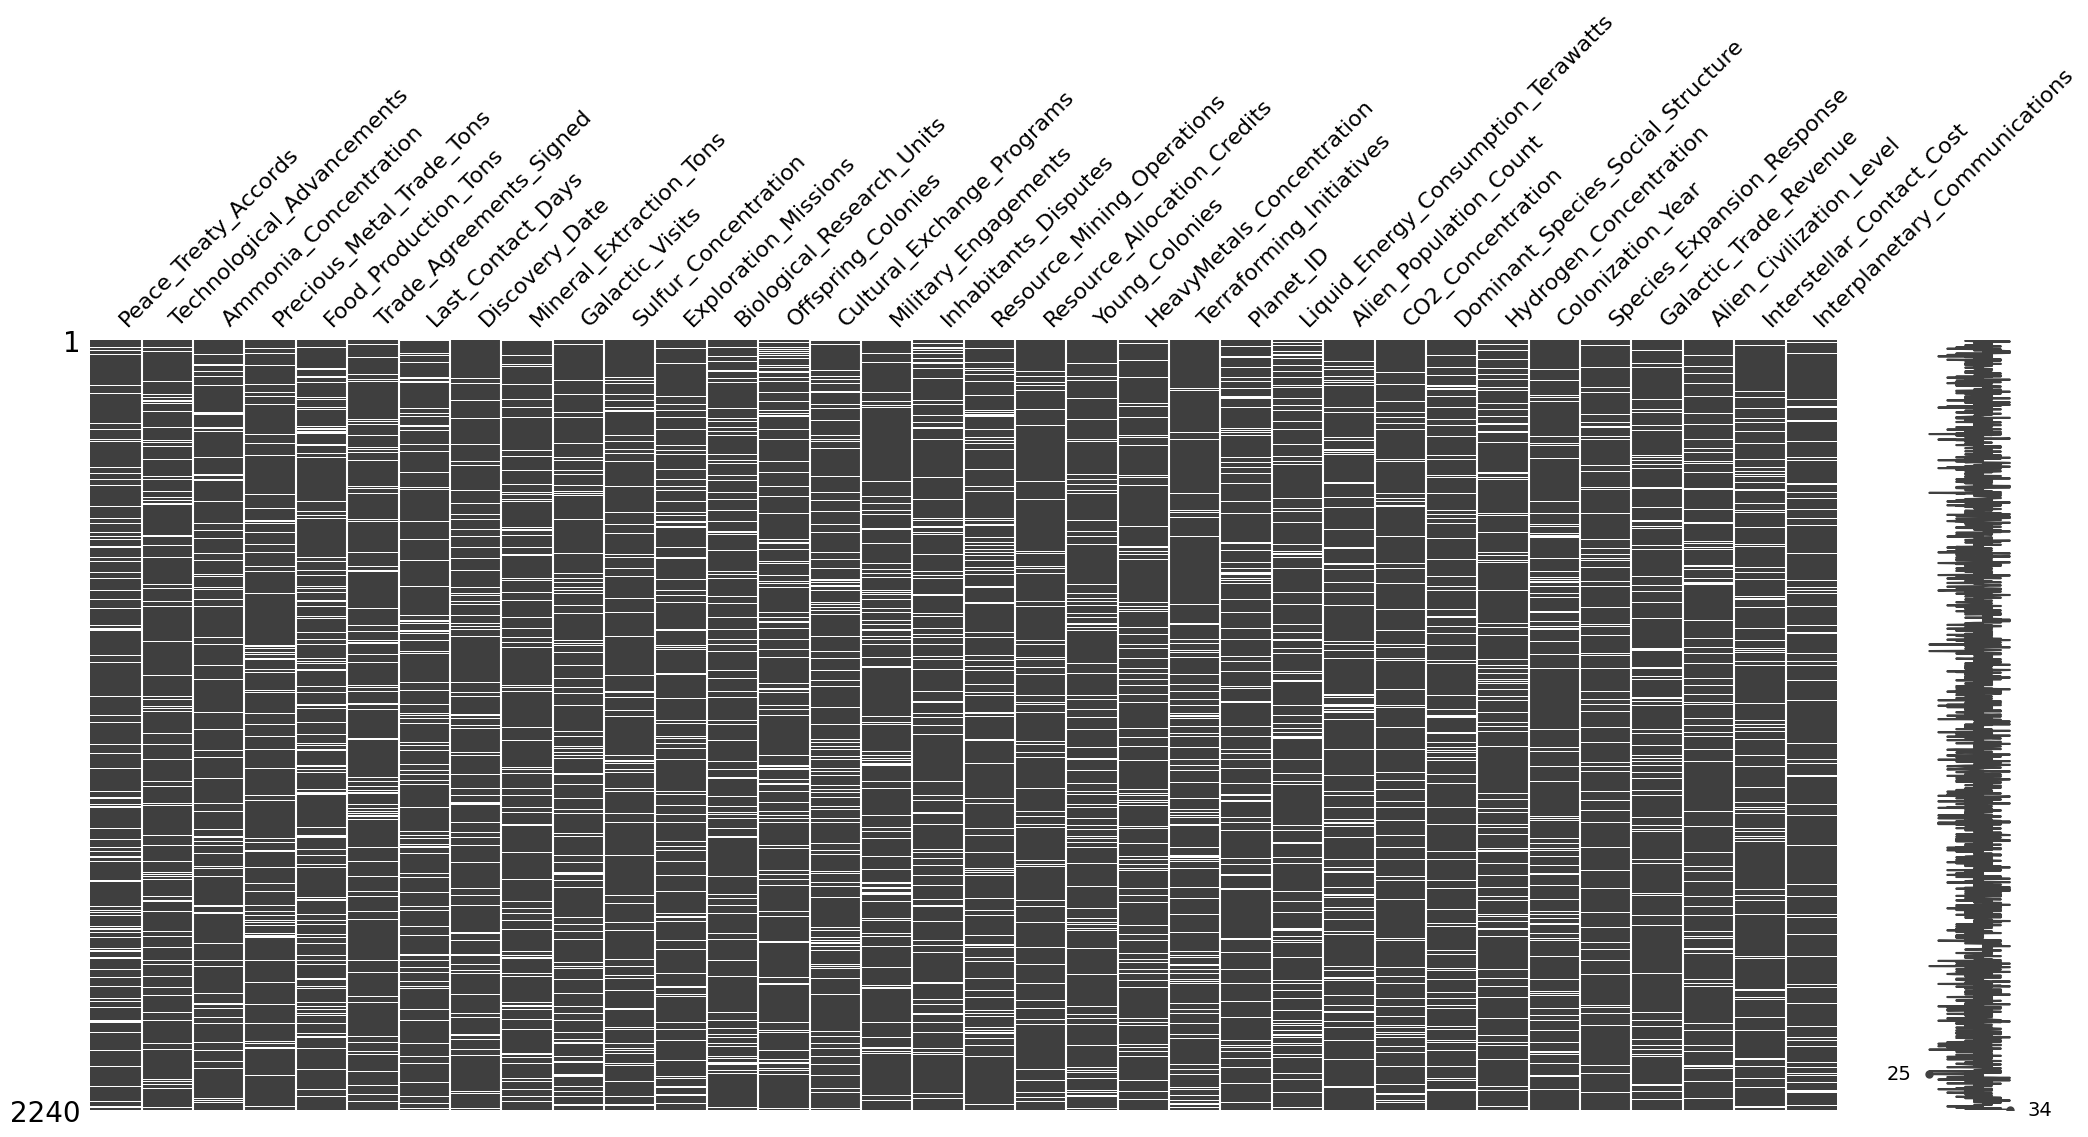

In [ ]:
import missingno as msno

msno.matrix(aliens_df)

<Axes: >

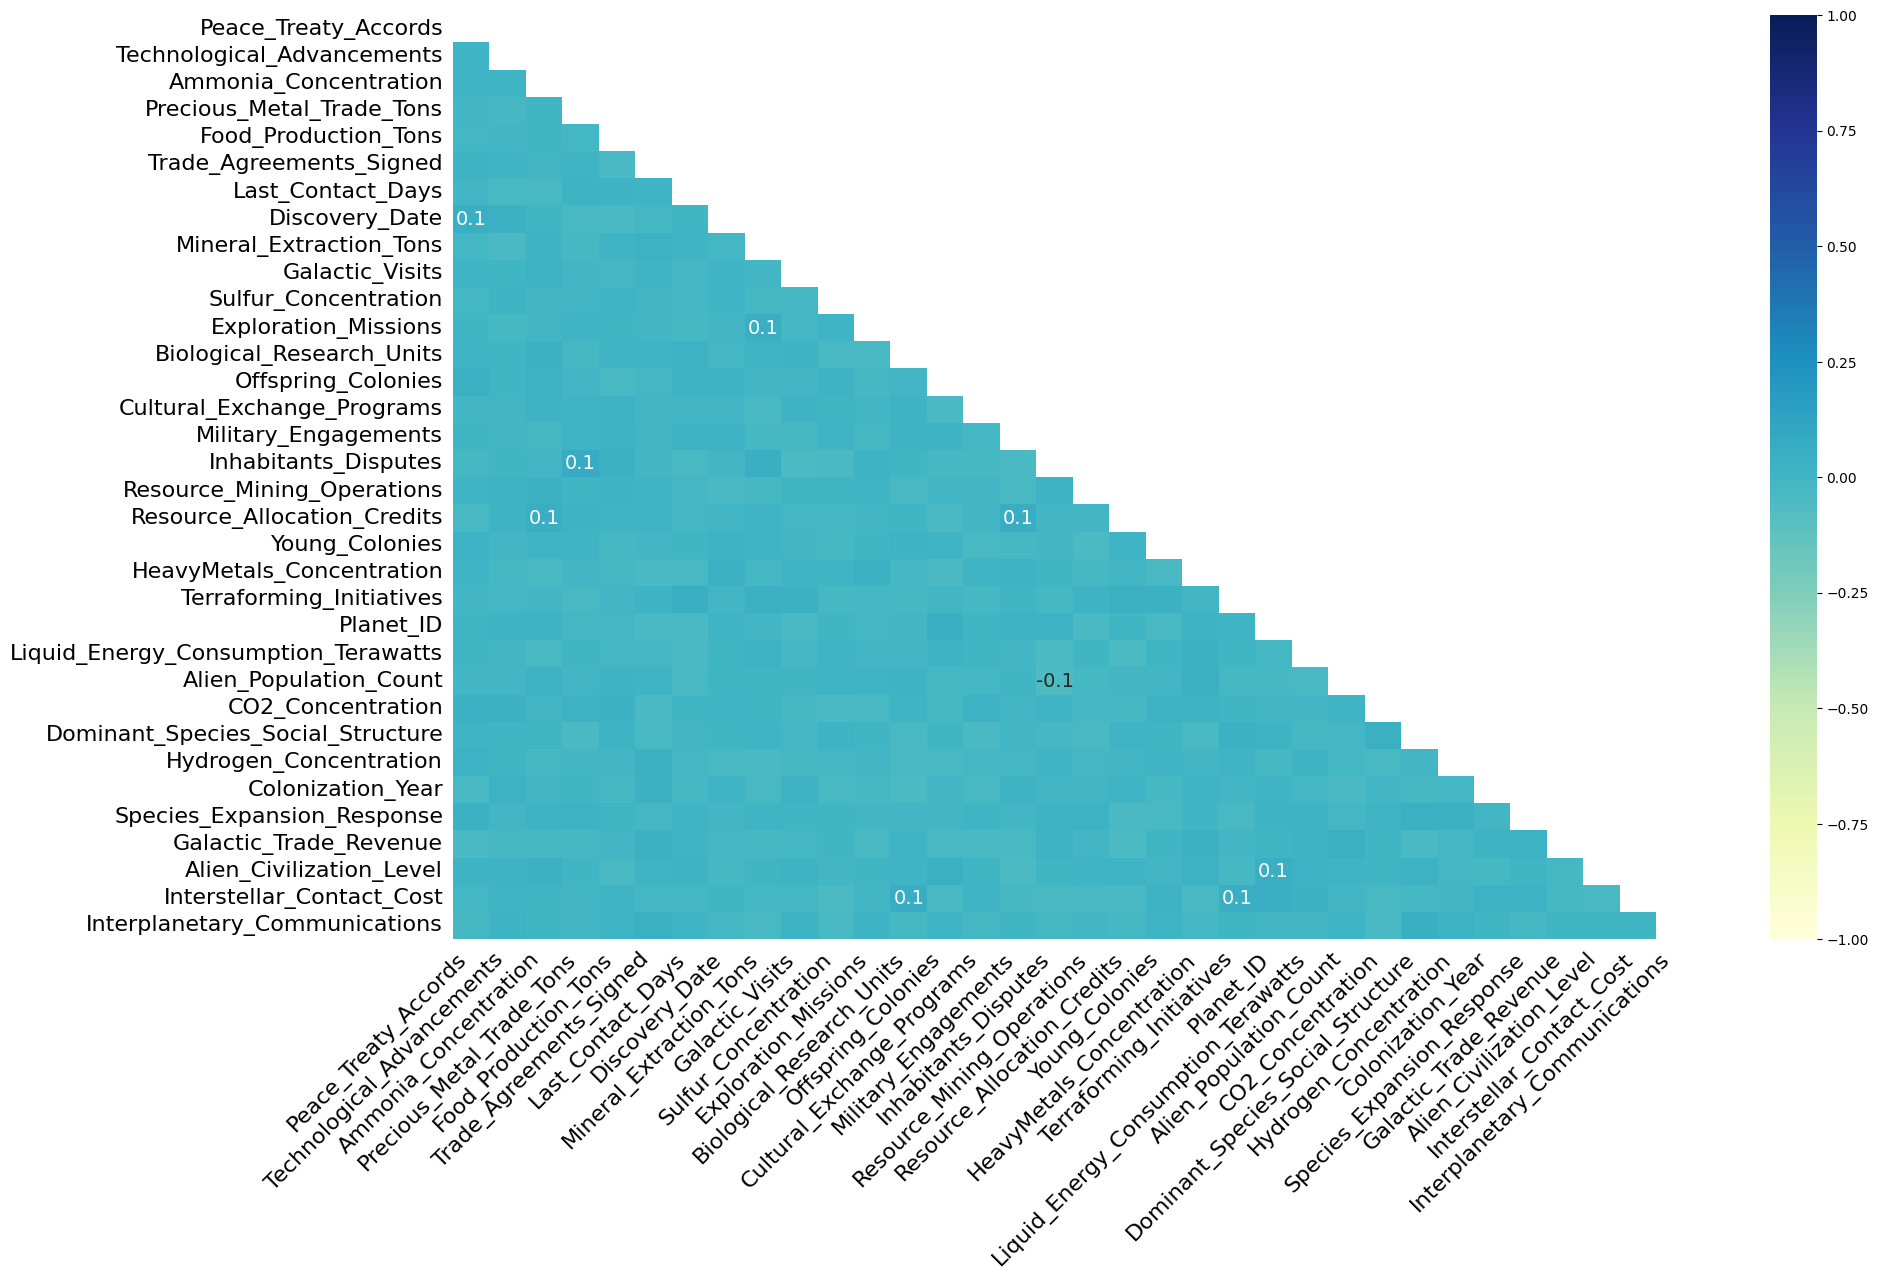

In [ ]:
msno.heatmap(aliens_df, cmap='YlGnBu', labels=True)
# No discearnable pattern in Missing Values --> Missing Completely at Random (MCAR)

In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns


missing_values_table(aliens_df)
#All Variables have about the same presentage of missing values

Your selected dataframe has 34 columns.
There are 34 columns that have missing values.


Missing Values  % of Total Values
Colonization_Year                               260               11.6
Galactic_Trade_Revenue                          257               11.5
Liquid_Energy_Consumption_Terawatts             248               11.1
Food_Production_Tons                            246               11.0
Alien_Population_Count                          241               10.8
Offspring_Colonies                              238               10.6
Peace_Treaty_Accords                            235               10.5
Last_Contact_Days                               234               10.4
Dominant_Species_Social_Structure               233               10.4
Hydrogen_Concentration                          231               10.3
Resource_Mining_Operations                      231               10.3
Terraforming_Initiatives                        230               10.3
Inhabitants_Disputes                            229               10.2
Young_Colonies                                  226               10.1
Discovery_Date                                  226               10.1
Interplanetary_Communications                   224               10.0
Cultural_Exchange_Programs                      224               10.0
Alien_Civilization_Level                        222                9.9
Exploration_Missions                            222                9.9
Galactic_Visits                                 220                9.8
Military_Engagements                            220                9.8
Ammonia_Concentration                           217                9.7
Planet_ID                                       216                9.6
Precious_Metal_Trade_Tons                       215                9.6
Interstellar_Contact_Cost                       215                9.6
Technological_Advancements                      212                9.5
HeavyMetals_Concentration                       210                9.4
Biological_Research_Units                       209                9.3
Sulfur_Concentration                            209                9.3
Mineral_Extraction_Tons                         208                9.3
Trade_Agreements_Signed                         207                9.2
Species_Expansion_Response                      202                9.0
Resource_Allocation_Credits                     200                8.9
CO2_Concentration                               192                8.6

Before filling the missing values, we need to remove the outliers

## Encoding categorical features into numerical and detecting outliers
###Categorical Encoding:

Label Encoding converts categorical values into numeric labels. Each unique value in a categorical column is assigned a unique integer.

The label_encoders dictionary stores the encoders for future inverse transformation (if needed).
###Outlier Detection:
First we have to remove the constant variables because they make the z-score NaN --> all inputs are outliers.

Z-score method: For each numerical column, calculate the z-score for each value. Outliers are those with a z-score exceeding the set threshold (we set to 6 as at threshold 5 - every datapoint is an outlier).

A high threshold reduces false positives.



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

def encode_categorical(df):
    label_encoders = {}  # Store encoders for future use
    for column in df.select_dtypes(include=['object', 'category']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))
        label_encoders[column] = le
    return df, label_encoders

aliens_df_encoded, label_encoders = encode_categorical(aliens_df)

def filter_valid_columns(df):
    valid_columns = []
    for column in df.columns:
        if df[column].dtype in ['float64', 'int64']:
            unique_values = df[column].nunique()
            if unique_values > 1:  # Exclude constant
                valid_columns.append(column)
    return df[valid_columns]

aliens_df_numeric = filter_valid_columns(aliens_df_encoded)


In [ ]:
# Check occurrences for specified variables
variables_to_check = ['Cultural_Exchange_Programs', 'Inhabitants_Disputes']

for variable in variables_to_check:
    if variable in aliens_df_numeric.columns:
        print(f"Value counts for {variable}:")
        print(aliens_df_numeric[variable].value_counts())
        print()  # Add space between outputs
    else:
        print(f"Variable {variable} not found in aliens_df_numeric.")


Value counts for Cultural_Exchange_Programs:
Cultural_Exchange_Programs
0.0    1989
1.0      27
Name: count, dtype: int64

Value counts for Inhabitants_Disputes:
Inhabitants_Disputes
0.0    1992
1.0      19
Name: count, dtype: int64



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from scipy.stats import zscore

# Remove outliers using z-score
def remove_outliers(df, threshold):
    initial_size = df.shape[0]
    for column in df.columns:
        try:
            z_scores = zscore(df[column], nan_policy='omit')
            valid_rows = (abs(z_scores) <= threshold) | df[column].isnull()
            df = df[valid_rows]
        except Exception as e:
            print(f"Skipping column {column}: {e}")
    final_size = df.shape[0]
    removed_count = initial_size - final_size
    return df, removed_count

# Unpack the tuple correctly
aliens_df_cleaned, outliers_removed = remove_outliers(aliens_df_numeric, threshold=6)

# Excluding variables 'Cultural_Exchange_Programs' 'Inhabitants_Disputes' which become constant with removing outliers
aliens_df_cleaned = filter_valid_columns(aliens_df_cleaned)
# Removing the 'Planet_ID' and 'Discovery_Date' variable because it has no meaning to fill in and no influence on the type of the planet
aliens_df_cleaned = aliens_df_cleaned.drop(columns=['Planet_ID'])
aliens_df_cleaned = aliens_df_cleaned.drop(columns=['Discovery_Date'])

# Now access the DataFrame
print(f"Number of outliers removed: {outliers_removed}")
print("Rows after cleaning:", aliens_df_cleaned.shape[0])


Number of outliers removed: 62
Rows after cleaning: 2178


###Scaling
We scale the data using robust scaling (as it is best when there are a lot of outliers)

In [ ]:
from sklearn.preprocessing import RobustScaler

# Apply robust scaling
scaler = RobustScaler()
aliens_df_scaled = pd.DataFrame(
    scaler.fit_transform(aliens_df_cleaned),
    columns=aliens_df_cleaned.columns
)

# Inspect the scaled data
print(aliens_df_scaled.describe())


       Peace_Treaty_Accords  Technological_Advancements  \
count           1949.000000                 1971.000000   
mean               0.064649                    0.062912   
std                0.245968                    0.242867   
min                0.000000                    0.000000   
25%                0.000000                    0.000000   
50%                0.000000                    0.000000   
75%                0.000000                    0.000000   
max                1.000000                    1.000000   

       Ammonia_Concentration  Precious_Metal_Trade_Tons  Food_Production_Tons  \
count            1968.000000                1969.000000           1939.000000   
mean                0.481199                   0.415640              0.573234   
std                 1.004642                   1.080177              1.245096   
min                -1.000000                  -0.500000             -0.250000   
25%                 0.000000                  -0.333333        

## Checking initial distribution cleared of outliers

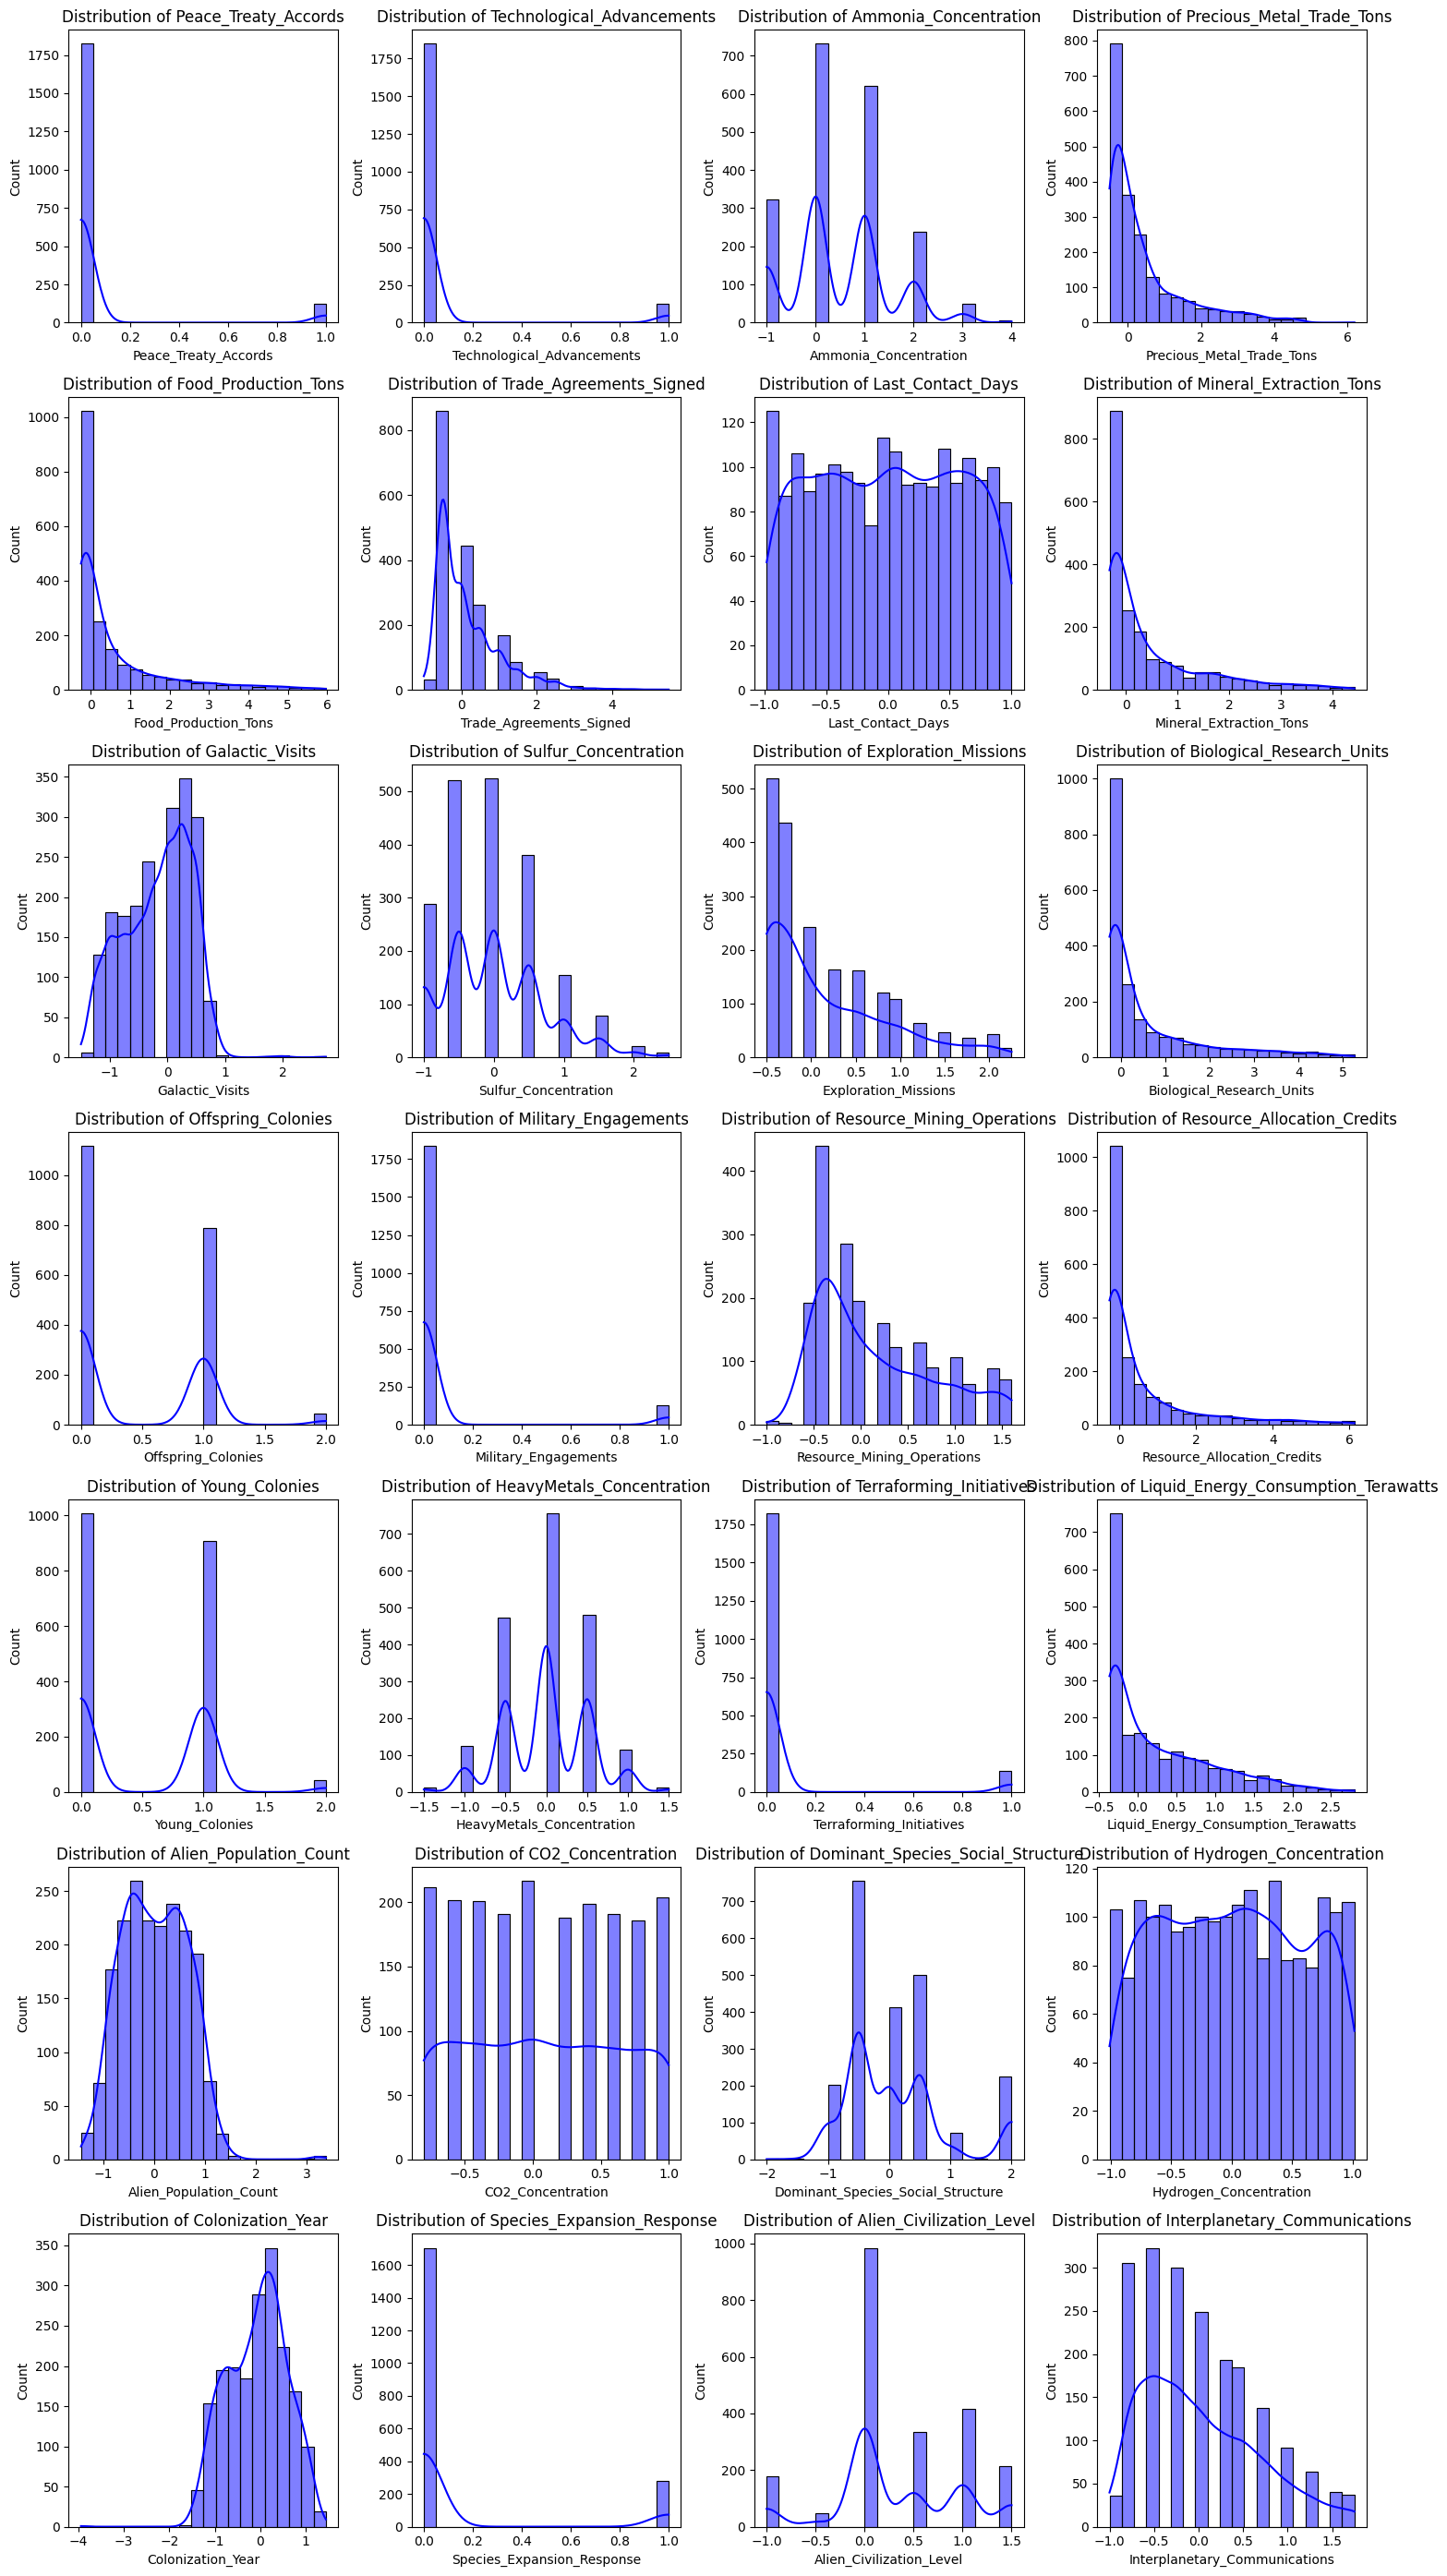

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def show_distribution(df):
  # Number of columns for the grid layout
  n_cols = 4

  # Total number of variables
  n_vars = len(df.columns)

  # Number of rows for the grid layout
  n_rows = math.ceil(n_vars / n_cols)

  # Create subplots
  fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
  axes = axes.flatten()  # Flatten to easily iterate over

  # Plot each variable
  for i, column in enumerate(df.columns):
      ax = axes[i]

      # Numerical variables: histogram
      sns.histplot(df[column], kde=True, bins=20, color='blue', ax=ax)
      ax.set_title(f"Distribution of {column}")

  # Hide any unused subplots
  for j in range(i + 1, len(axes)):
      fig.delaxes(axes[j])

  # Adjust layout
  plt.tight_layout()
  plt.show()

show_distribution(aliens_df_scaled)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

def knn_impute_with_existing_values(df, n_neighbors=5):
    """
    Impute missing values using KNN, ensuring imputed values match existing ones
    (no restriction on frequency of occurrence).
    """
    # Step 1: Impute missing values using KNN
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)
    df_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

    # Step 2: Map imputed values to the closest existing value in the column
    for column in df.columns:
        # Get the unique existing values in the column
        existing_values = df[column].dropna().unique()

        if existing_values.size > 0:  # Ensure there are existing values to map to
            df_imputed[column] = df_imputed[column].apply(
                lambda x: existing_values[np.argmin(np.abs(existing_values - x))]  # Find closest existing value
            )

    return df_imputed

# Apply the function to the scaled DataFrame
aliens_df_filled = knn_impute_with_existing_values(aliens_df_scaled, n_neighbors=5)

# Check the results
print(aliens_df_filled.isnull().sum())  # Should show no missing values

Peace_Treaty_Accords                   0
Technological_Advancements             0
Ammonia_Concentration                  0
Precious_Metal_Trade_Tons              0
Food_Production_Tons                   0
Trade_Agreements_Signed                0
Last_Contact_Days                      0
Mineral_Extraction_Tons                0
Galactic_Visits                        0
Sulfur_Concentration                   0
Exploration_Missions                   0
Biological_Research_Units              0
Offspring_Colonies                     0
Military_Engagements                   0
Resource_Mining_Operations             0
Resource_Allocation_Credits            0
Young_Colonies                         0
HeavyMetals_Concentration              0
Terraforming_Initiatives               0
Liquid_Energy_Consumption_Terawatts    0
Alien_Population_Count                 0
CO2_Concentration                      0
Dominant_Species_Social_Structure      0
Hydrogen_Concentration                 0
Colonization_Yea

## Recheck distribution (we've confirm no missing values above) after we remove the has_outliers (constant)

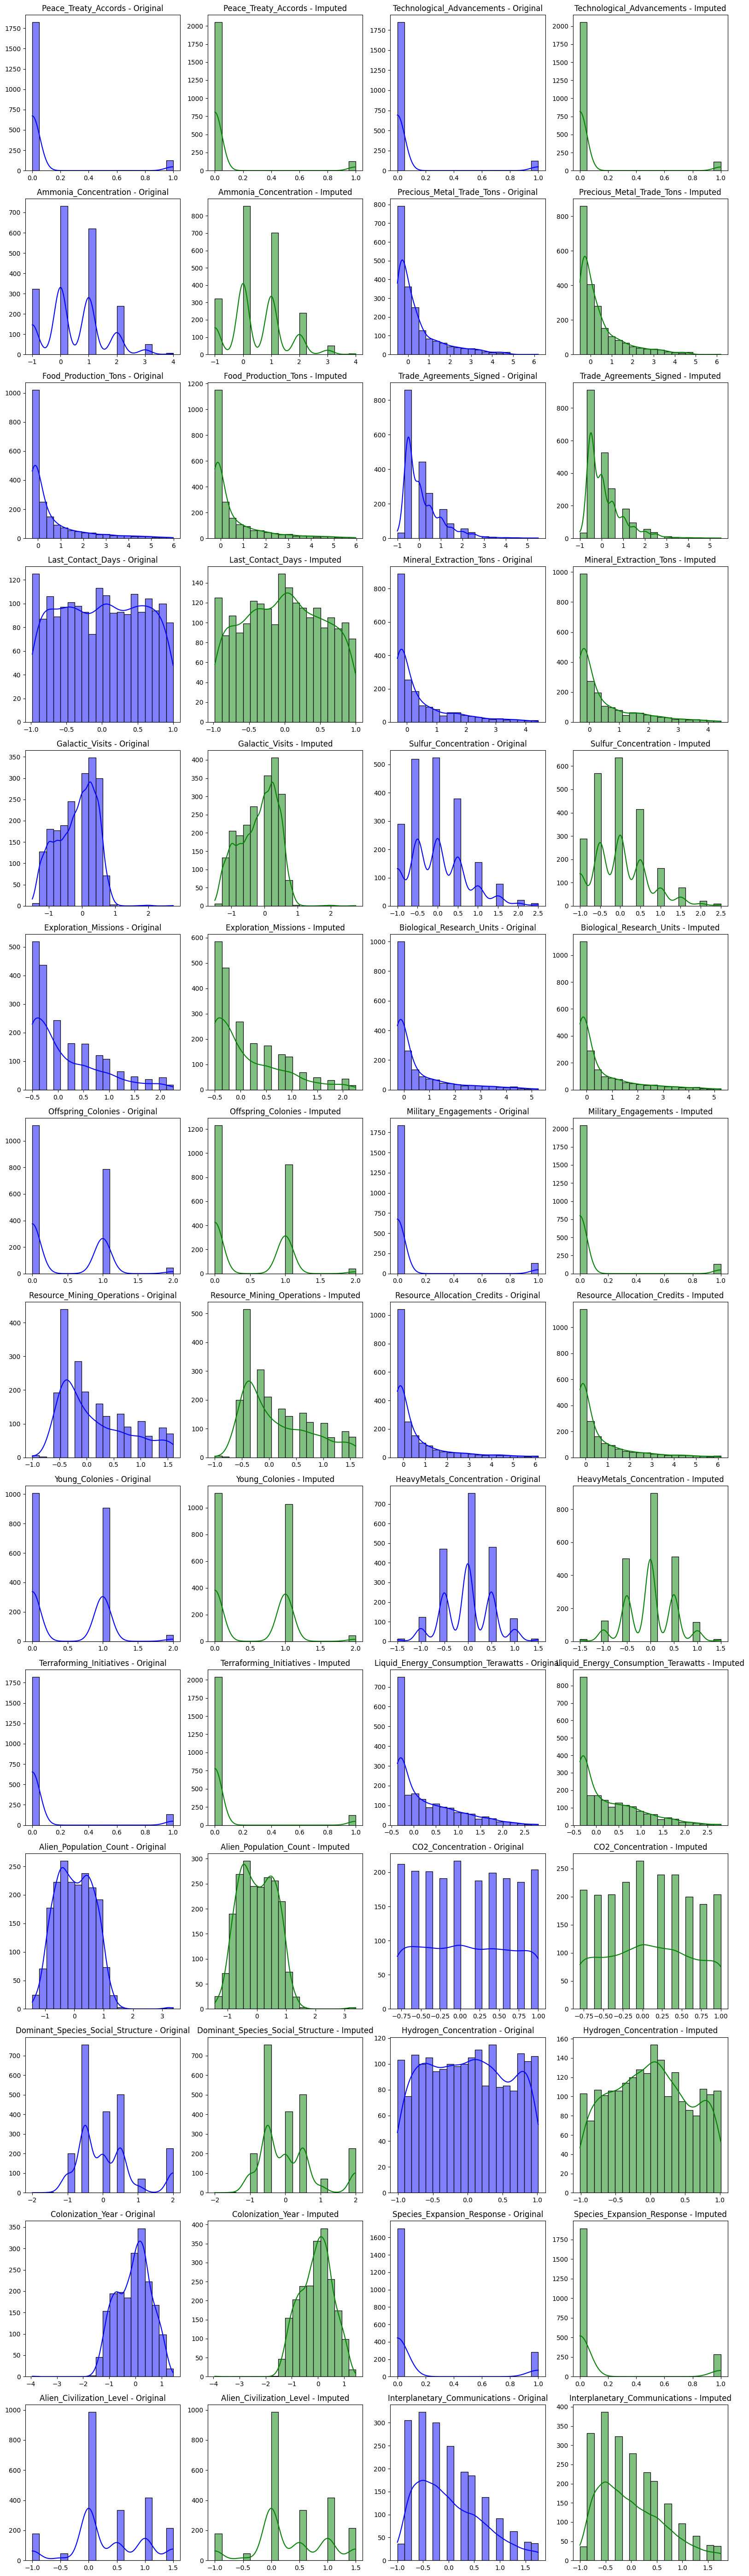

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the list of all columns in the DataFrame
columns_to_compare = aliens_df_scaled.columns

# Set the number of columns (4 columns for side-by-side comparisons)
n_columns = 4

# Calculate the number of rows needed based on the number of variables
n_rows = (len(columns_to_compare) * 2 + n_columns - 1) // n_columns  # Ceiling division to fit all plots

# Create subplots with 4 columns
fig, axes = plt.subplots(n_rows, n_columns, figsize=(16, 4 * n_rows))

# Flatten axes array to iterate easily
axes = axes.flatten()

# Loop through columns and plot distributions
for i, column in enumerate(columns_to_compare):
    # Plot for aliens_df_scaled (original data)
    sns.histplot(aliens_df_scaled[column], kde=True, color='blue', ax=axes[2 * i], bins=20)
    axes[2 * i].set_title(f'{column} - Original')
    axes[2 * i].set_xlabel('')
    axes[2 * i].set_ylabel('')

    # Plot for aliens_df_filled (imputed data)
    sns.histplot(aliens_df_filled[column], kde=True, color='green', ax=axes[2 * i + 1], bins=20)
    axes[2 * i + 1].set_title(f'{column} - Imputed')
    axes[2 * i + 1].set_xlabel('')
    axes[2 * i + 1].set_ylabel('')

# Adjust layout for better spacing between plots
plt.tight_layout()
plt.show()



We see little differences in distribution here and there but they are not critical. Discovery_Date doesn't change tho???

Do we need to turn the categorical back???

##Feature engineering
- remove useless variables and create new ones from correlated ones


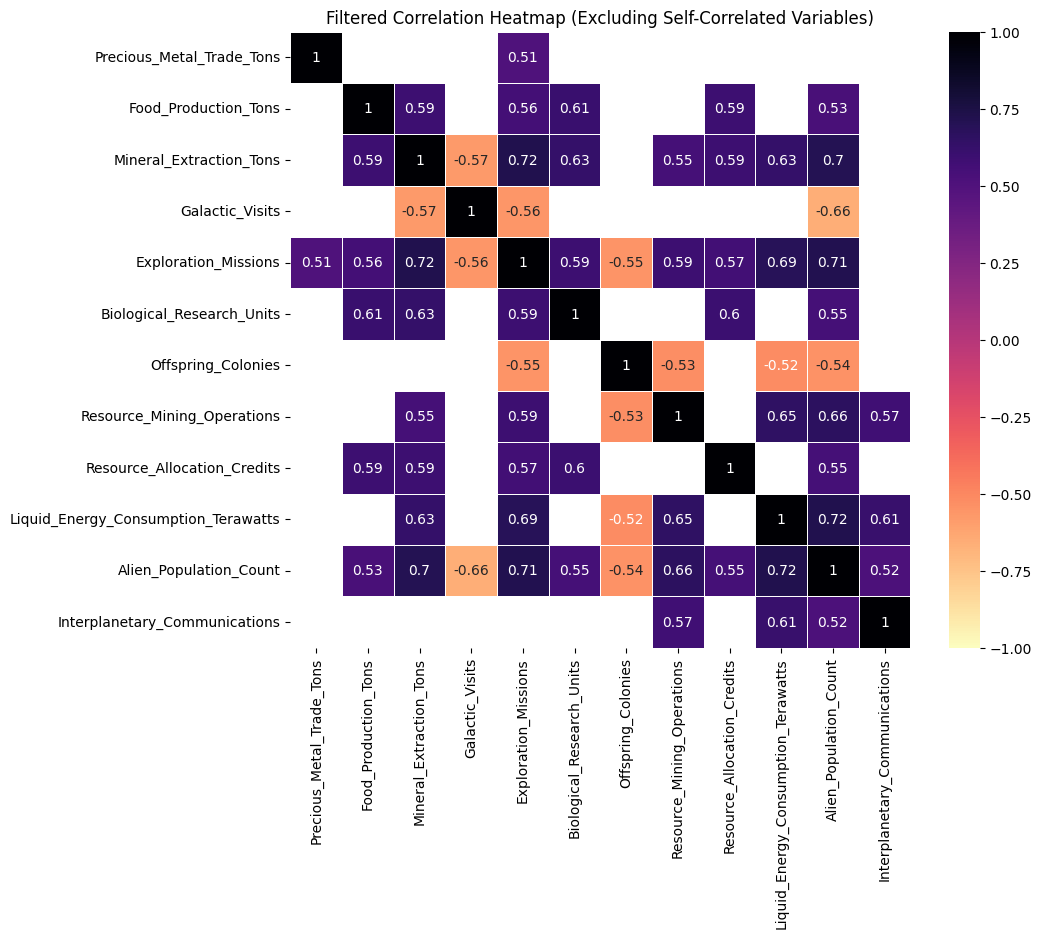

In [ ]:
# Step 1: Compute the correlation matrix
correlation_matrix = aliens_df_filled.corr() #No need to remove categorical, since all are numeric

# Step 2: Filter correlations above t or below -t
t = 0.5 # 0.5 or 0.4 ???
filtered_correlation = correlation_matrix[(correlation_matrix > t) | (correlation_matrix < -t)]

# Step 3: Drop rows and columns where all values are NaN
filtered_correlation = filtered_correlation.dropna(how='all', axis=0).dropna(how='all', axis=1)

# Step 4: Drop variables that only correlate with themselves
# Find variables with correlations > t or < -t with others
relevant_vars = filtered_correlation.columns[
    (filtered_correlation.abs() > t).sum(axis=1) > 1
]
filtered_correlation = filtered_correlation.loc[relevant_vars, relevant_vars]

# Step 5: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_correlation, annot=True, cmap="magma_r", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Filtered Correlation Heatmap (Excluding Self-Correlated Variables)")
plt.show()

# Applying 3 clustering models (KMeans, Hierarchical clustering, DBSCAN) with default hyperparameters
## PCA
We will first perform dimentional reduction using PCA not to use all our features for training the models.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
# creating PCA components
PCA = PCA(n_components = 3)
X_PCA = PCA.fit_transform(aliens_df_filled)

# finding the top contributors for our PCA components
components = PCA.components_
loadings_df = pd.DataFrame(components.T,
                           columns=[f"PC{i+1}" for i in range(components.shape[0])],
                           index=aliens_df_filled.columns)
top_contributors_pc1 = loadings_df['PC1'].abs().nlargest(2).index.tolist()
top_contributors_pc2 = loadings_df['PC2'].abs().nlargest(2).index.tolist()
top_contributors_pc3 = loadings_df['PC3'].abs().nlargest(2).index.tolist()

print("Top 2 contributors to PC1:", top_contributors_pc1)
print("Top 2 contributors to PC2:", top_contributors_pc2)
print("Top 2 contributors to PC3:", top_contributors_pc3)

Top 2 contributors to PC1: ['Resource_Allocation_Credits', 'Food_Production_Tons']
Top 2 contributors to PC2: ['Trade_Agreements_Signed', 'Precious_Metal_Trade_Tons']
Top 2 contributors to PC3: ['Ammonia_Concentration', 'Food_Production_Tons']


## K-Means


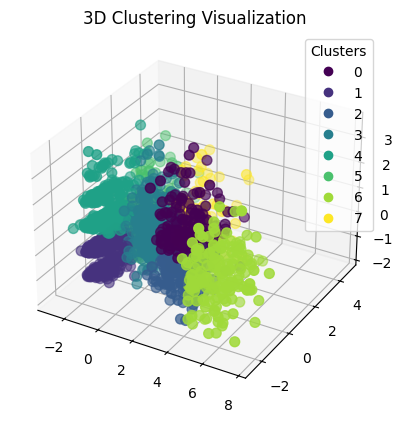

The Silhouette score is 0.3229751031245267


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# applying the Kmeans clustering model (with default hyperparameters)and plotting the results
kmeans = KMeans()
kmeans.fit(X_PCA)
cluster_labels = kmeans.labels_
sil_kms = silhouette_score(X_PCA, cluster_labels)

#plotting to get 3d visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_PCA[:, 0], X_PCA[:, 1], X_PCA[:, 2],
                     c=cluster_labels, cmap='viridis', s=50)
handles, labels = scatter.legend_elements()
ax.legend(handles, labels, title="Clusters")
ax.set_title('3D Clustering Visualization')
plt.show()
print("The Silhouette score is", sil_kms)

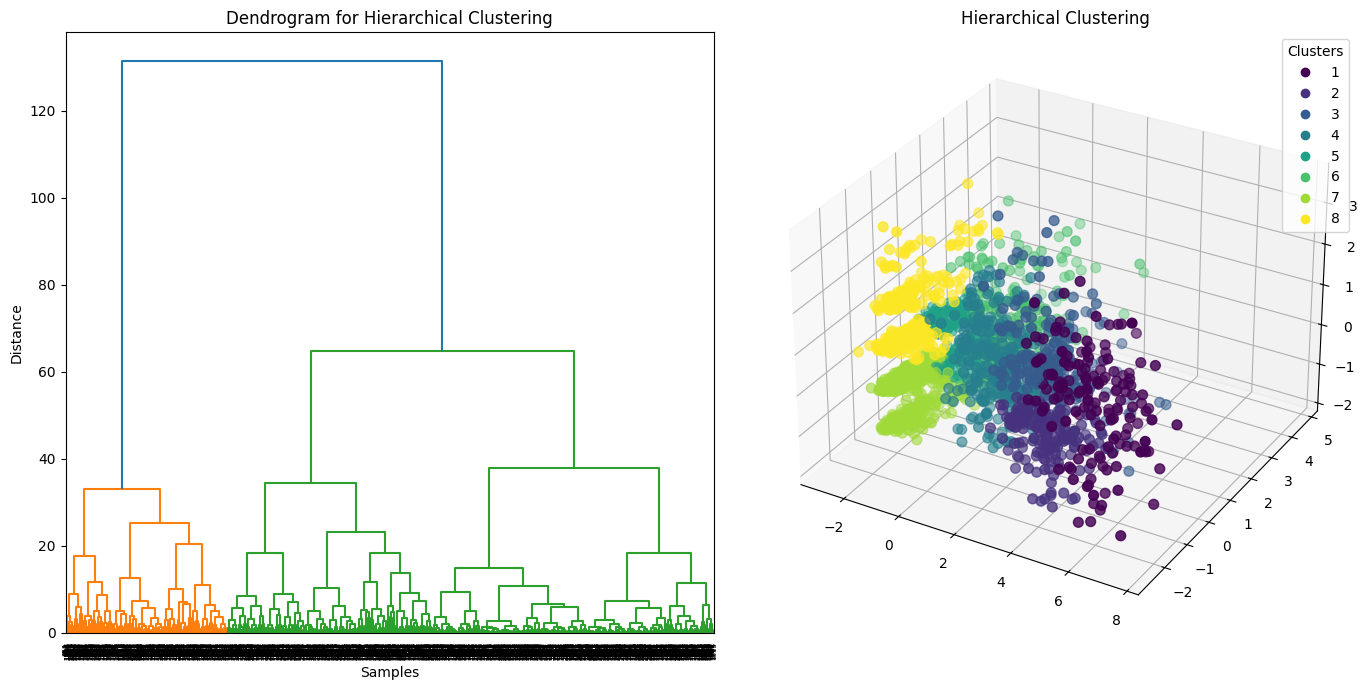

The Silhouette score is 0.26163893538919747


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# applying the Hierarchical clustering model (with )
hierarchical_model = linkage(X_PCA, method="ward")

labels = fcluster(hierarchical_model, 8, criterion='maxclust') # we are using 8 clusters like in KMeans model
sil_hc8 = silhouette_score(X_PCA, labels)
fig = plt.figure(figsize=(14, 7))

# Plotting the dendrogram
ax1 = fig.add_subplot(121)
dendrogram(hierarchical_model)
ax1.set_title('Dendrogram for Hierarchical Clustering')
ax1.set_xlabel('Samples')
ax1.set_ylabel('Distance')

# Plotting clusrering results
ax2 = fig.add_subplot(122, projection='3d')  # 2nd plot on the right for 3D scatter plot
scatter_hierarchical = ax2.scatter(X_PCA[:, 0], X_PCA[:, 1], X_PCA[:, 2],
                                   c=labels, cmap='viridis', s=50)
ax2.set_title('Hierarchical Clustering')
handles, legend_labels = scatter_hierarchical.legend_elements()
ax2.legend(handles, legend_labels, title="Clusters")
plt.tight_layout()
plt.show()

print("The Silhouette score is", sil_hc8)

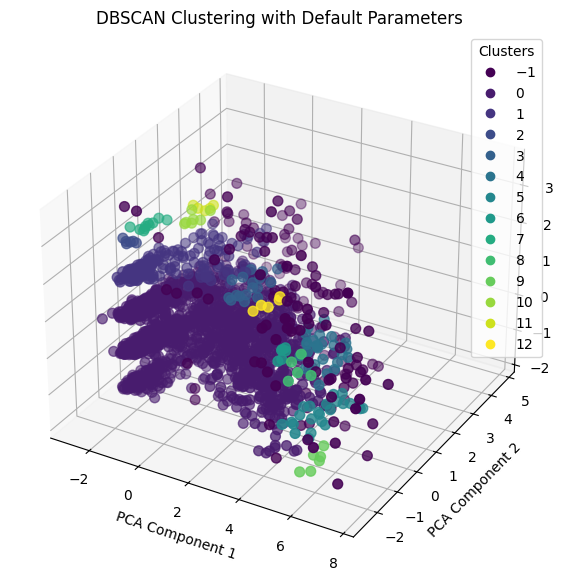

The Silhouette score is -0.14272674729872184


In [ ]:
from sklearn.cluster import DBSCAN
# Apply DBSCAN
dbscan = DBSCAN()  # we again use default hyperparameters
dbscan_labels = dbscan.fit_predict(X_PCA)
sil_score_dbscan = silhouette_score(X_PCA, dbscan_labels)
# plotting the result of DBSCAN
fig = plt.figure(figsize=(10, 7))
ax0 = fig.add_subplot(111, projection='3d')
scatter = ax0.scatter(X_PCA[:, 0], X_PCA[:, 1], X_PCA[:, 2],
                     c=dbscan_labels, cmap='viridis', s=50)
handles, legend_labels = scatter.legend_elements()
ax0.legend(handles, legend_labels, title="Clusters")
ax0.set_title('DBSCAN Clustering with Default Parameters')
ax0.set_xlabel('PCA Component 1')
ax0.set_ylabel('PCA Component 2')
ax0.set_zlabel('PCA Component 3')
plt.show()
print("The Silhouette score is", sil_score_dbscan)

As we can see, we have a rather poor performance of DBSCAN.

# Finding hyperparameters for our models, that will maximize the Silhouette score

For K-means clustering we will check 2 parameters: number of clusters and initialization method

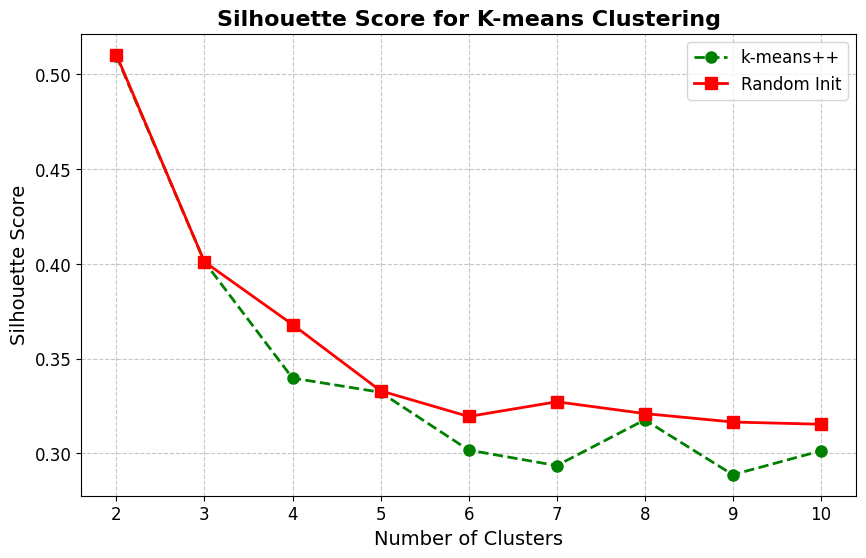

In [ ]:
def silhouette_scores_kmeans(data, max_clusters=10):
    sil_scores_kmeanspp = []
    sil_scores_random = []
    cluster_range = range(2, max_clusters + 1)

    # Calculating silhouette scores for each number of clusters
    for k in cluster_range:
        # K-means++ initialization
        kmeans_pp = KMeans(n_clusters=k, init='k-means++', random_state=42)
        clusters_pp = kmeans_pp.fit_predict(data)
        score_pp = silhouette_score(data, clusters_pp)
        sil_scores_kmeanspp.append(score_pp)

        # Random initialization
        kmeans_random = KMeans(n_clusters=k, init='random', random_state=42)
        clusters_random = kmeans_random.fit_predict(data)
        score_random = silhouette_score(data, clusters_random)
        sil_scores_random.append(score_random)

    # Plot silhouette scores for both methods
    plt.figure(figsize=(10, 6))
    plt.plot(cluster_range, sil_scores_kmeanspp, marker='o', color='g', linestyle='--', linewidth=2, markersize=8, label='k-means++')
    plt.plot(cluster_range, sil_scores_random, marker='s', color='r', linestyle='-', linewidth=2, markersize=8, label='Random Init')

    plt.title('Silhouette Score for K-means Clustering', fontsize=16, fontweight='bold')
    plt.xlabel('Number of Clusters', fontsize=14)
    plt.ylabel('Silhouette Score', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.show()

silhouette_scores_kmeans(X_PCA, max_clusters=10)

Random initialization performs slightly better than k-means++. The optimal number of clusters for our model is 4.

For hierarchical clustering we find number of clusters and linkage method

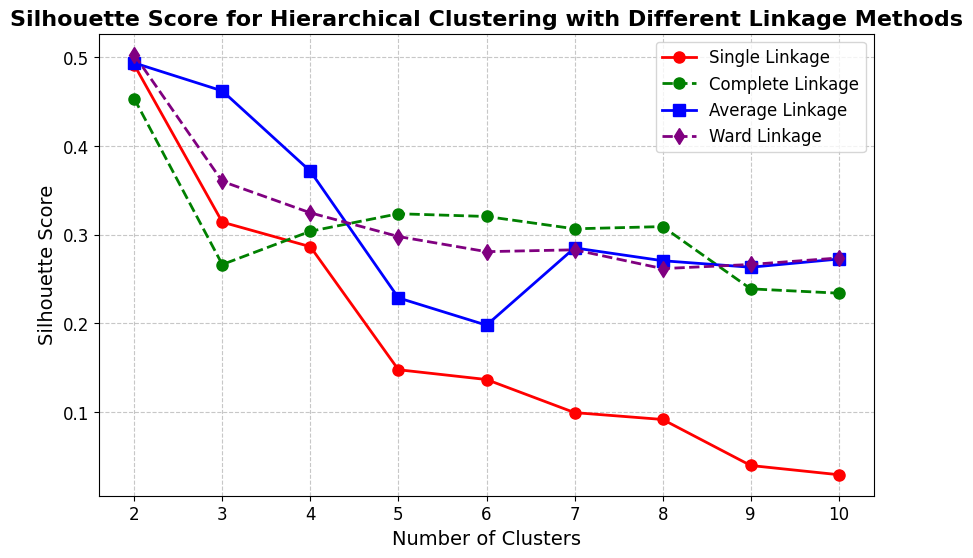

In [ ]:
def silhouette_scores_hierarchical(data, max_clusters=10):
    sil_scores_single = []
    sil_scores_complete = []
    sil_scores_average = []
    sil_scores_ward = []
    sil_scores_centroid = []

    cluster_range = range(2, max_clusters + 1)
    Z1 = linkage(data, method='single')
    Z2 = linkage(data, method='complete')
    Z3 = linkage(data, method='average')
    Z4 = linkage(data, method='ward')

    # calculating silhouette scores for each linkage method
    for n_clusters in cluster_range:

        labels_single = fcluster(Z1, n_clusters, criterion='maxclust')
        sil_scores_single.append(silhouette_score(data, labels_single))

        labels_complete = fcluster(Z2, n_clusters, criterion='maxclust')
        sil_scores_complete.append(silhouette_score(data, labels_complete))

        labels_average = fcluster(Z3, n_clusters, criterion='maxclust')
        sil_scores_average.append(silhouette_score(data, labels_average))

        labels_ward = fcluster(Z4, n_clusters, criterion='maxclust')
        sil_scores_ward.append(silhouette_score(data, labels_ward))

    # plotting silhouette scores for all linkage methods
    plt.figure(figsize=(10, 6))
    plt.plot(cluster_range, sil_scores_single, marker='o', color='r', linestyle='-', linewidth=2, markersize=8, label='Single Linkage')
    plt.plot(cluster_range, sil_scores_complete, marker='o', color='g', linestyle='--', linewidth=2, markersize=8, label='Complete Linkage')
    plt.plot(cluster_range, sil_scores_average, marker='s', color='b', linestyle='-', linewidth=2, markersize=8, label='Average Linkage')
    plt.plot(cluster_range, sil_scores_ward, marker='d', color='purple', linestyle='--', linewidth=2, markersize=8, label='Ward Linkage')

    plt.title('Silhouette Score for Hierarchical Clustering with Different Linkage Methods', fontsize=16, fontweight='bold')
    plt.xlabel('Number of Clusters', fontsize=14)
    plt.ylabel('Silhouette Score', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.show()

silhouette_scores_hierarchical(X_PCA, max_clusters=10)

Various linkage methods perform differently depending on the number of clusters. If we choose 4 clusters, the best metod for our data is average method.

For DBSCAN model we have eps (epsilon), min_samples, matric, which can be "euclidian" or "manhattan"



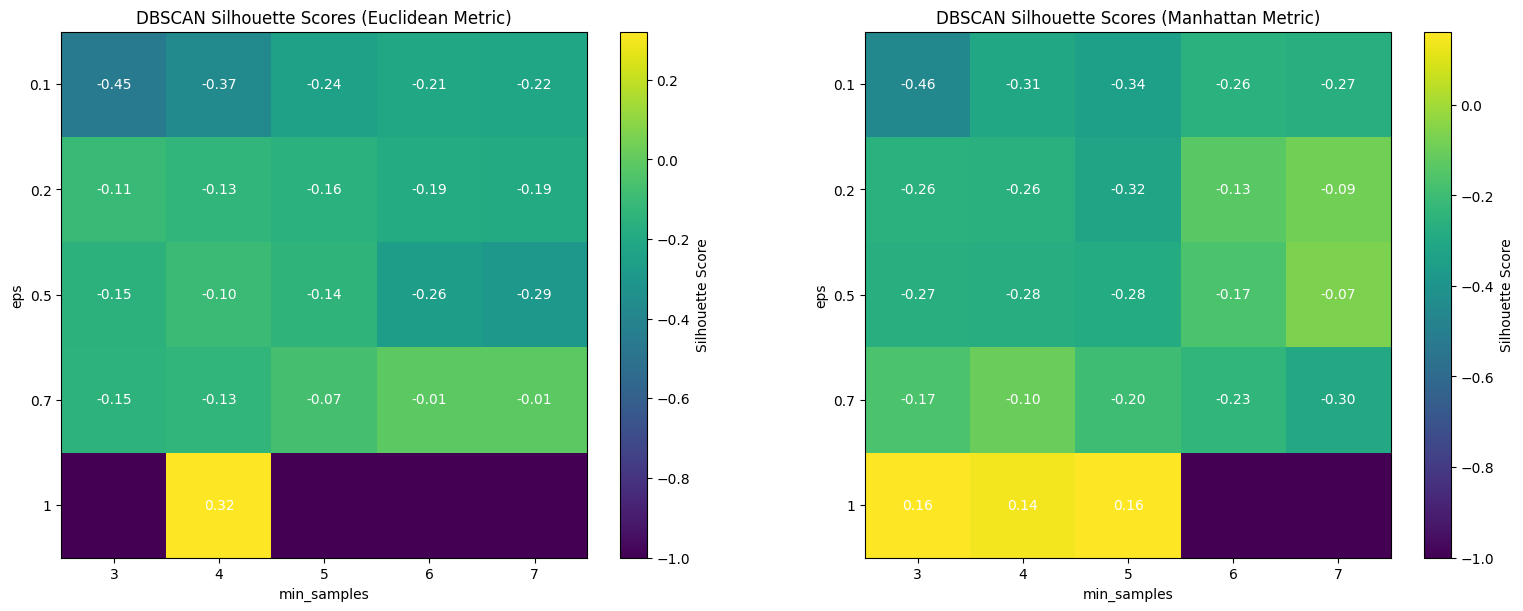

In [ ]:
def dbscan_silhouette_heatmaps(data, eps_values, min_samples_values):
    metrics = ['euclidean', 'manhattan']
    silhouette_scores = {
        metric: np.full((len(eps_values), len(min_samples_values)), -1.0) for metric in metrics
    }

    # looping through metrics and parameter grids
    for metric in metrics:
        for i, eps in enumerate(eps_values):
            for j, min_samples in enumerate(min_samples_values):
                dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
                labels = dbscan.fit_predict(data)

                n_clusters = len(set(labels)) - (1 if -1 in labels else 0) # not counting  noise
                if n_clusters > 1:
                    silhouette_avg = silhouette_score(data, labels)
                    silhouette_scores[metric][i, j] = silhouette_avg


    # plotting heatmaps for both metrics
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)

    for ax, metric in zip(axes, metrics):
        scores = silhouette_scores[metric]
        im = ax.imshow(scores, interpolation='nearest', cmap='viridis', origin='upper')
        cbar = plt.colorbar(im, ax=ax, label="Silhouette Score")
        ax.set_xticks(range(len(min_samples_values)))
        ax.set_yticks(range(len(eps_values)))
        ax.set_xticklabels(min_samples_values)
        ax.set_yticklabels(eps_values)
        ax.set_xlabel("min_samples")
        ax.set_ylabel("eps")
        ax.set_title(f"DBSCAN Silhouette Scores ({metric.capitalize()} Metric)")

        for i in range(scores.shape[0]):
            for j in range(scores.shape[1]):
                score = scores[i, j]
                if score > -1:  # Only annotate if a valid score exists
                    ax.text(j, i, f"{score:.2f}", ha="center", va="center", color="white")
    plt.show()

eps_values = [0.1, 0.2, 0.5, 0.7, 1]
min_samples_values = [3, 4, 5, 6, 7]

dbscan_silhouette_heatmaps(X_PCA, eps_values, min_samples_values)

In our function, empty parts represent parameters, with which only 1 cluster was found. As we can see, the performance is quite low for our data, so we will not consider it for further comparison

### Applying new best hyperparameters for K-means and hierarchial clustering and applying comparing the results

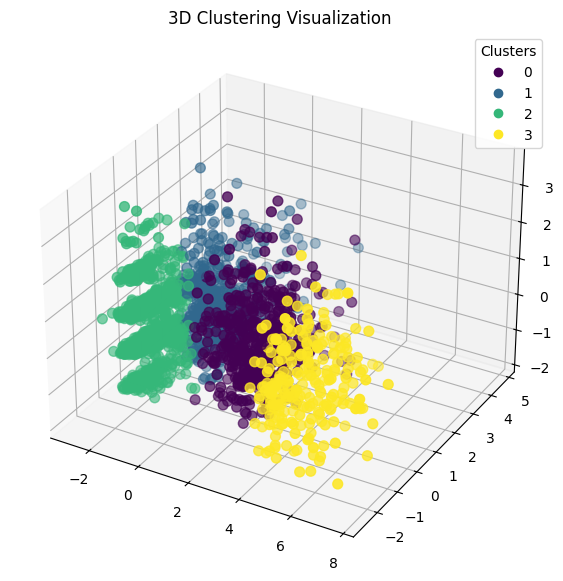

In [ ]:
# applying the Kmeans clustering model (with new hyperparameters) and plotting the results
kmeans_new = KMeans(n_clusters=4, init='random', random_state=42)
cluster_labels_new = kmeans_new.fit_predict(X_PCA)
sil_kms_r4 = silhouette_score(X_PCA, cluster_labels_new)
ch_score_kms_r4 = calinski_harabasz_score(X_PCA, cluster_labels_new)# calculating also Calinski-Harabasz score
db_score_kms_r4 = davies_bouldin_score(X_PCA, cluster_labels_new)# as well as Davies-Bouldin index

# plotting to get 3d visualization
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_PCA[:, 0], X_PCA[:, 1], X_PCA[:, 2],
                     c=cluster_labels_new, cmap='viridis', s=50)
handles, labels = scatter.legend_elements()
ax.legend(handles, labels, title="Clusters")
ax.set_title('3D Clustering Visualization')
plt.show()

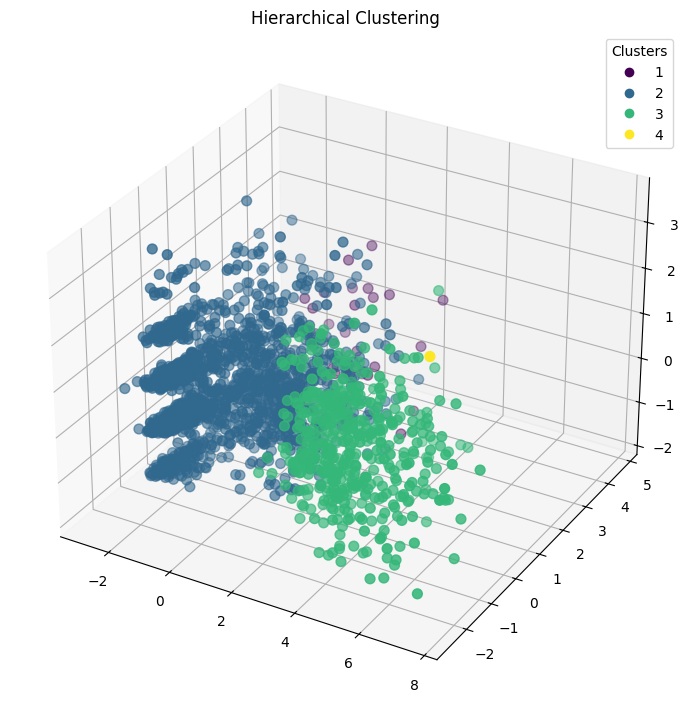

In [ ]:
hierarchical_model_av = linkage(X_PCA, method="average")
labels_new_av = fcluster(hierarchical_model_av, 4, criterion='maxclust') # we are using 3 clusters like in KMeans model
sil_hc4av = silhouette_score(X_PCA, labels_new_av)
ch_score_hc4av = calinski_harabasz_score(X_PCA, labels_new_av)
db_score_hc4av = davies_bouldin_score(X_PCA, labels_new_av)

fig = plt.figure(figsize=(14, 7))
ax2 = fig.add_subplot(122, projection='3d')  # 2nd plot on the right for 3D scatter plot
scatter_hierarchical = ax2.scatter(X_PCA[:, 0], X_PCA[:, 1], X_PCA[:, 2],
                                   c=labels_new_av, cmap='viridis', s=50)
ax2.set_title('Hierarchical Clustering')
handles, legend_labels = scatter_hierarchical.legend_elements()
ax2.legend(handles, legend_labels, title="Clusters")
plt.tight_layout()
plt.show()

Although the score is quite high, the performance is not the best one, since we got only 2 well defined clusters instead of 4.
We try another method, which is ward

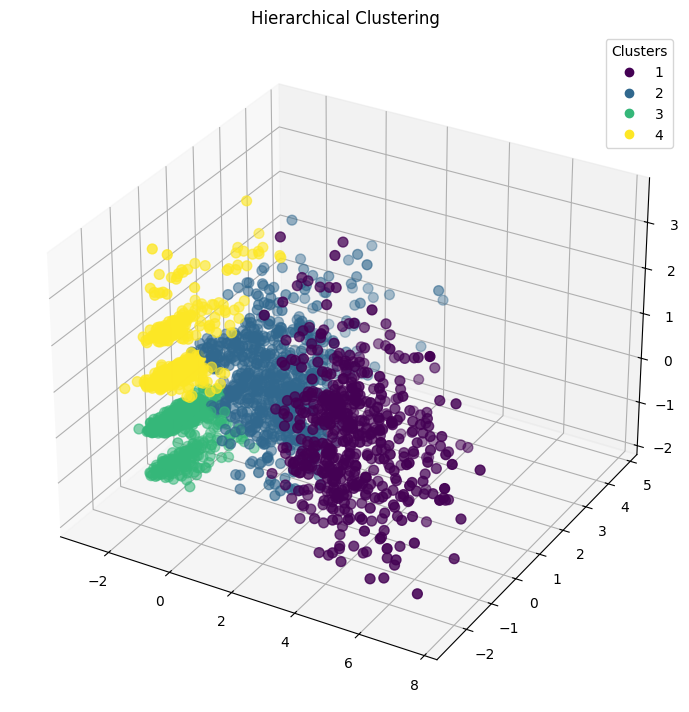

In [ ]:
hierarchical_model_w = linkage(X_PCA, method="ward")
labels_new_w = fcluster(hierarchical_model_w, 4, criterion='maxclust') # we are using 3 clusters like in KMeans model
sil_hc4w = silhouette_score(X_PCA, labels_new_w)
ch_score_hc4w = calinski_harabasz_score(X_PCA, labels_new_w)
db_score_hc4w = davies_bouldin_score(X_PCA, labels_new_w)

fig = plt.figure(figsize=(14, 7))
ax2 = fig.add_subplot(122, projection='3d')  # 2nd plot on the right for 3D scatter plot
scatter_hierarchical = ax2.scatter(X_PCA[:, 0], X_PCA[:, 1], X_PCA[:, 2],
                                   c=labels_new_w, cmap='viridis', s=50)
ax2.set_title('Hierarchical Clustering')
handles, legend_labels = scatter_hierarchical.legend_elements()
ax2.legend(handles, legend_labels, title="Clusters")
plt.tight_layout()
plt.show()

Way better performance, now we will also see our models with other number of clusters and hyperparameters and put everything in the table

In [ ]:
# different k_means
kmeans_new = KMeans(n_clusters=4, init='k-means++', random_state=42)
cluster_labels_k4 = kmeans_new.fit_predict(X_PCA)
sil_kms_k4 = silhouette_score(X_PCA, cluster_labels_k4)
ch_score_kms_k4 = calinski_harabasz_score(X_PCA, cluster_labels_k4)
db_score_kms_k4 = davies_bouldin_score(X_PCA, cluster_labels_k4)

kmeans_new1 = KMeans(n_clusters=5, init='random', random_state=42)
cluster_labels_r5 = kmeans_new1.fit_predict(X_PCA)
sil_kms_r5 = silhouette_score(X_PCA, cluster_labels_r5)
ch_score_kms_r5 = calinski_harabasz_score(X_PCA, cluster_labels_r5)
db_score_kms_r5 = davies_bouldin_score(X_PCA, cluster_labels_r5)

kmeans_new2 = KMeans(n_clusters=5, init='k-means++', random_state=42)
cluster_labels_k5 = kmeans_new2.fit_predict(X_PCA)
sil_kms_k5 = silhouette_score(X_PCA, cluster_labels_k5)
ch_score_kms_k5 = calinski_harabasz_score(X_PCA, cluster_labels_k5)
db_score_kms_k5 = davies_bouldin_score(X_PCA, cluster_labels_k5)

# different Hierarchical
hierarchical_model_av5 = linkage(X_PCA, method="average")
labels_new_5av = fcluster(hierarchical_model_av5, 5, criterion='maxclust') # we are using 3 clusters like in KMeans model
sil_hc5av = silhouette_score(X_PCA, labels_new_5av)
ch_score_hc5av = calinski_harabasz_score(X_PCA, labels_new_5av)
db_score_hc5av = davies_bouldin_score(X_PCA, labels_new_5av)

hierarchical_model_w5 = linkage(X_PCA, method="ward")
labels_new_w5 = fcluster(hierarchical_model_w5, 4, criterion='maxclust') # we are using 3 clusters like in KMeans model
sil_hc5w = silhouette_score(X_PCA, labels_new_w5)
ch_score_hc5w = calinski_harabasz_score(X_PCA, labels_new_w5)
db_score_hc5w = davies_bouldin_score(X_PCA, labels_new_w5)

In [ ]:
results = {
    "Clustering Algorithm": ["KMeans(4 clusters, init = random)", "KMeans(4 clusters, init = kmeans++)", "Hierarchical (4 clusters, average)", "Hierarchical (4 clusters, ward)", "KMeans(5 clusters, init = random)", "KMeans(5 clusters, init = kmeans++)", "Hierarchical (5 clusters, average)","Hierarchical (5 clusters, ward)"],
    "Silhouette Score": [sil_kms_r4, sil_kms_k4, sil_hc4av, sil_hc4w, sil_kms_r5, sil_kms_k5, sil_hc5av, sil_hc5w],
    "Davies-Bouldin Index": [db_score_kms_r4, db_score_kms_k4, db_score_hc4av, db_score_hc4w, db_score_kms_r5, db_score_kms_k5, db_score_hc5av, db_score_hc5w],
    "Calinski-Harabasz Index": [ch_score_kms_r4, ch_score_kms_k4, ch_score_hc4av, ch_score_hc4w, ch_score_kms_r5, ch_score_kms_k5, ch_score_hc5av, ch_score_hc5w]}

results_df = pd.DataFrame(results)
results_df

Clustering Algorithm  Silhouette Score  \
0    KMeans(4 clusters, init = random)          0.368010   
1  KMeans(4 clusters, init = kmeans++)          0.339729   
2   Hierarchical (4 clusters, average)          0.371533   
3      Hierarchical (4 clusters, ward)          0.324577   
4    KMeans(5 clusters, init = random)          0.333002   
5  KMeans(5 clusters, init = kmeans++)          0.332238   
6   Hierarchical (5 clusters, average)          0.228646   
7      Hierarchical (5 clusters, ward)          0.324577   

   Davies-Bouldin Index  Calinski-Harabasz Index  
0              1.063667              2060.024907  
1              0.978934              1944.760596  
2              0.701945               833.760778  
3              0.944441              1758.477732  
4              1.026948              1955.665989  
5              1.032815              1955.571110  
6              0.807510               663.209367  
7              0.944441              1758.477732

This is the table with our results. Although Hierarchical clustering with average method had the highest score for 4 clusters, it did not perform well.

For 4 clusters (optimal number in our opinion), we consider K-means clustering with random initialixation to be the best one.

For 5 clusters, K-means is still a better option, although the initialization method does not matter now, since the difference is very small.

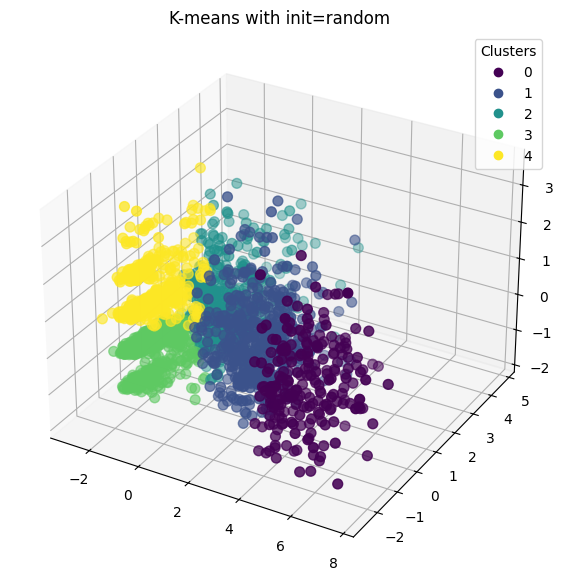

In [ ]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_PCA[:, 0], X_PCA[:, 1], X_PCA[:, 2],
                     c=cluster_labels_r5, cmap='viridis', s=50)
handles, labels = scatter.legend_elements()
ax.legend(handles, labels, title="Clusters")
ax.set_title('K-means with init=random')
plt.show()

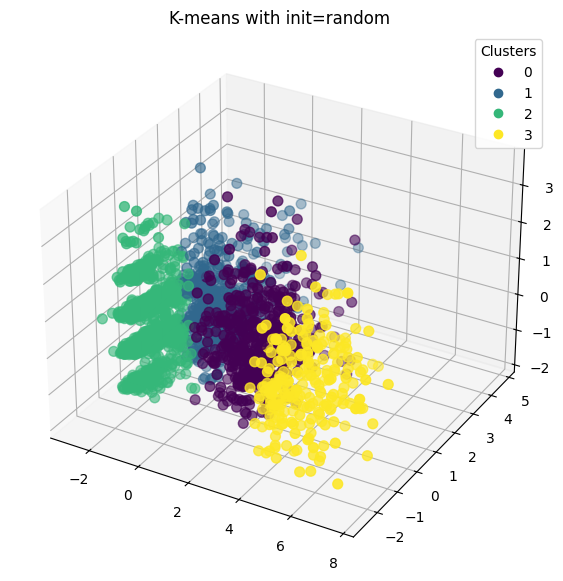

In [ ]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_PCA[:, 0], X_PCA[:, 1], X_PCA[:, 2],
                     c=cluster_labels_new, cmap='viridis', s=50)
handles, labels = scatter.legend_elements()
ax.legend(handles, labels, title="Clusters")
ax.set_title('K-means with init=random')
plt.show()